# **Nhận diện chữ số viết tay - Handwritten Digit Recognition**

🇻🇳 Dự án nhỏ nhằm mô phỏng quá trình huấn luyện và dự đoán chữ số viết tay từ dữ liệu MNIST.  
Trong dự án này, tôi sẽ sử dụng hai mô hình học máy phổ biến: **Random Forest** và **Support Vector Machine (SVM)** để so sánh hiệu quả phân loại.

🇺🇸 This mini project demonstrates training and predicting handwritten digits from the MNIST dataset.  
In this project, I will use two popular machine learning models: **Random Forest** and **Support Vector Machine (SVM)** to compare classification performance.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


## 📥 Load dữ liệu / Load the Data

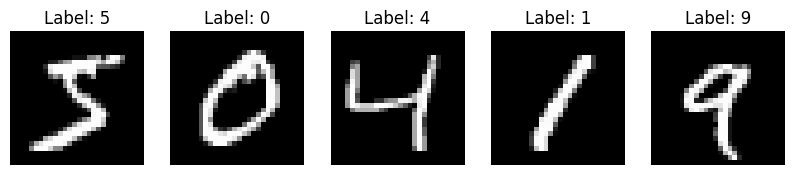

In [2]:
# Load the MNIST dataset from OpenML
# Tải bộ dữ liệu MNIST từ OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(np.uint8)  # Convert labels to integers / Chuyển nhãn về kiểu số nguyên

# Display 5 sample images from the dataset
# Hiển thị 5 ảnh mẫu từ bộ dữ liệu
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')  # Reshape the flat image into 28x28 pixels / Đưa ảnh về kích thước 28x28
    ax.set_title(f"Label: {y[i]}")                # Show label / Hiển thị nhãn
    ax.axis('off')                                # Hide axes / Ẩn trục tọa độ
plt.show()  # Show the plot / Hiển thị biểu đồ


## ⚙️ Tiền xử lý dữ liệu / Preprocess the Data

In [3]:
# Chia tập train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🚀 Huấn luyện mô hình / Train the Model

In [5]:
# Initialize the SVM model
# Khởi tạo mô hình SVM
svm_model = SVC(kernel='rbf', C=10)  # The 'rbf' kernel works well for non-linear data
                                     # Kernel 'rbf' hoạt động tốt với dữ liệu phi tuyến tính
svm_model.fit(X_train, y_train)      # Train the model / Huấn luyện mô hình

# Initialize the Random Forest model
# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Use 100 trees in the forest / Sử dụng 100 cây trong rừng
rf_model.fit(X_train, y_train)  # Train the model / Huấn luyện mô hình


RandomForestClassifier(random_state=42)

## 📊 Đánh giá mô hình / Evaluate the Model

In [6]:
# Predict and evaluate SVM model
# Dự đoán và đánh giá mô hình SVM
y_pred_svm = svm_model.predict(X_test)                     # Predict using SVM / Dự đoán bằng SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)          # Calculate accuracy / Tính độ chính xác
print(f"Độ chính xác của SVM: {accuracy_svm:.4f}")         # Print accuracy / In ra độ chính xác

# Predict and evaluate Random Forest model
# Dự đoán và đánh giá mô hình Random Forest
y_pred_rf = rf_model.predict(X_test)                       # Predict using Random Forest / Dự đoán bằng Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)            # Calculate accuracy / Tính độ chính xác
print(f"Độ chính xác của Random Forest: {accuracy_rf:.4f}")  # Print accuracy / In ra độ chính xác


Độ chính xác của SVM: 0.9823
Độ chính xác của Random Forest: 0.9673


#💾 Save the Model/ Lưu các mô hình đã được huấn luyện

In [7]:
# Save the trained models
# Lưu các mô hình đã được huấn luyện

joblib.dump(svm_model, "mnist_svm_model.pkl")   # Save SVM model to file / Lưu mô hình SVM vào file
joblib.dump(rf_model, "mnist_rf_model.pkl")     # Save Random Forest model to file / Lưu mô hình Random Forest vào file


['mnist_rf_model.pkl']

# Training and Evaluating Models on MNIST [full]
# Huấn luyện và đánh giá mô hình trên tập dữ liệu MNIST

In [ ]:
# Training and Evaluating Models on MNIST
# Huấn luyện và đánh giá mô hình trên tập dữ liệu MNIST

from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Load MNIST dataset from OpenML
# Tải dataset MNIST từ OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(np.uint8)  # Chuyển nhãn về kiểu số nguyên

# Split dataset into training and testing sets (80% train, 20% test)
# Chia tập dữ liệu thành train và test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
# Khởi tạo và huấn luyện mô hình SVM
svm_model = SVC(kernel='rbf', C=10)  # Kernel 'rbf' works well for non-linear data
svm_model.fit(X_train, y_train)

# Initialize and train the Random Forest model
# Khởi tạo và huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the SVM model
# Dự đoán và đánh giá mô hình SVM
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Độ chính xác của SVM: {accuracy_svm:.4f}")  # Print accuracy

# Predict and evaluate the Random Forest model
# Dự đoán và đánh giá mô hình Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Độ chính xác của Random Forest: {accuracy_rf:.4f}")  # Print accuracy

# Save the trained models
# Lưu các mô hình đã được huấn luyện
joblib.dump(svm_model, "mnist_svm_model.pkl")    # Save SVM model to file
joblib.dump(rf_model, "mnist_rf_model.pkl")      # Save Random Forest model to file


Độ chính xác của SVM: 0.9823
Độ chính xác của Random Forest: 0.9673


['mnist_rf_model.pkl']

#**Next, let's build the interface using Streamlit.**

*Tiếp theo, ta sẽ xây dựng giao diện sử dụng Streamlit.*


#First, we need to install the required libraries!
Đầu tiên, ta cần cài các thư viện cần thiết!

In [8]:
# 📌 Cài đặt thư viện trên Google Colab
# 🇻🇳 Nếu bạn đang dùng Google Colab, hãy giữ nguyên dấu "!" để cài đặt thư viện.
# 🇺🇸 If you're using Google Colab, keep the "!" to install packages.

!pip install streamlit
!pip install pyngrok

# 💡 Nếu bạn chạy trên máy cá nhân (local), hãy mở Terminal hoặc Command Prompt và gõ lệnh:
# pip install streamlit
# pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 133.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.2 MB/s eta 0:00:00


#**Next, let's create the interface.**
*Sau đó, ta sẽ tạo giao diện.*


In [13]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
from PIL import Image

# Load pre-trained model
# Tải mô hình đã huấn luyện
model = joblib.load("mnist_svm_model.pkl")

st.title("🖋️ Nhận diện chữ viết tay - Handwritten Digit Recognition")

# File uploader for image input
# Giao diện tải ảnh lên từ người dùng
uploaded_file = st.file_uploader("Tải ảnh lên (28x28 pixels, nền trắng)", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    # Read image and convert to grayscale
    # Đọc ảnh và chuyển sang ảnh xám
    image = Image.open(uploaded_file).convert("L")

    # Resize to 28x28 (MNIST input size)
    # Resize ảnh về 28x28 pixel
    image = image.resize((28, 28))

    # Convert image to array and reshape
    # Chuyển ảnh thành mảng và reshape thành 1 dòng
    image_array = np.array(image).reshape(1, -1)

    # Predict the digit using the model
    # Dự đoán chữ số bằng mô hình
    prediction = model.predict(image_array)[0]

    # Display image and prediction
    # Hiển thị ảnh và kết quả dự đoán
    st.image(image, caption=f"📌 Dự đoán: {prediction}", width=150)


Overwriting app.py


# At this point, to run the app, you need to log in to ngrok and get the authtoken!
Đến đây, để chạy App, bạn cần đăng nhập trên ngrok, rồi lấy authtoken!


- Step 1: Create an account at: https://dashboard.ngrok.com/login?state=0MZdko9buyFsE2RW-1tFrA4KegSYNVU7JMBTL5MJA_luBJvdgi7y3HJkDhj2KUskjAWLa-ObG_Z3DNV1e5I_xlhHktGPw2fSzQUKaPEQCB_vp1wg2WkJm-EBhSPLH7rsgqjDp-b8c1tJz6qnzC7zmV7yYzgdyXSBmHRb6RUnDXzheBwPCFyFgGy-

- Step 2: Get your authtoken here: https://dashboard.ngrok.com/get-started/your-authtoken

In [10]:
# Cần đăng nhập trên ngrok để lấy autoken! (Need to login on ngrok to get autoken!)
# Đây là autoken của tôi, bạn cần tự lấy autoken thay vào! (This is my autoken, you have to auto get autoken!)
!ngrok authtoken "2vnX9rYN7CO6Ah7xA73xsu2HF1R_7JeDiWoAKyKFJHPXc2BiX"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


#**Next, run the code below, and click on the link to go to our web app.**
*Sau đó, ta chạy đoạn code bên dưới, click vào link để chuyển đến web của chúng ta.*


In [14]:
#Chạy App

from pyngrok import ngrok
public_url = ngrok.connect(8501, "http")  # Xóa tham số "port="
print(f"Truy cập Streamlit tại: {public_url}")

!streamlit run app.py


Truy cập Streamlit tại: NgrokTunnel: "https://3750-34-16-222-171.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.222.171:8501

  Stopping...
